In [1]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt
import random
import copy
import time

In [2]:
WIDTH = 101
HEIGHT = 101
STEP = 1000
FOREST_DENSITY = 0.7
# 0 for ground, 1 for tree, -1 for fire
map = [[0 for _ in range(WIDTH)] for _ in range(HEIGHT)]
for i in range(HEIGHT):
    for j in range(WIDTH):
        if random.random() <= FOREST_DENSITY:
            map[i][j] = 1
RAND_GROW = 0.01
RAND_FIRE = 0.0001

In [3]:
directs = [[0, 1], [0, -1], [1, 0], [-1, 0], [1, 1], [-1, -1], [1, -1], [-1, 1]]
def change(ori_map):
    new_map = [[0 for _ in range(WIDTH)] for _ in range(HEIGHT)]
    for i in range(HEIGHT):
        for j in range(WIDTH):
            if ori_map[i][j] == -1:
                new_map[i][j] = 0
            else:
                new_map[i][j] = ori_map[i][j]
                is_fire = False
                for direct in directs:
                    ni = i+direct[0]
                    nj = j+direct[1]
                    if 0<=ni<HEIGHT and 0<=nj<WIDTH:
                        if ori_map[ni][nj] == -1:
                            is_fire = True
                            break
                if new_map[i][j] == 1 and (random.random() < RAND_FIRE or is_fire):
                    new_map[i][j] = -1
                elif new_map[i][j] == 0 and random.random() < RAND_GROW:
                    new_map[i][j] = 1
    return new_map

In [4]:
def count(ori_map, value):
    cnt = 0
    for i in range(HEIGHT):
        for j in range(WIDTH):
            if ori_map[i][j] == value:
                cnt += 1
    return cnt

In [5]:
tree_cnt = []
fire_cnt = []
ground_cnt = []
for _ in range(STEP):
    plt.figure(figsize=(10, 10), dpi=50)
    plt.imshow(map, cmap='RdYlGn', vmin=-1, vmax=1)
    plt.title("Step %d" % (_+1))
    plt.axis('off')
    plt.show()
    
    #time.sleep(.01)
    tree_cnt.append(count(map, 1))
    fire_cnt.append(count(map, -1))
    ground_cnt.append(count(map, 0))
    
    map = change(map)
    display.clear_output(wait=True)
    plt.close('all')

KeyboardInterrupt: 

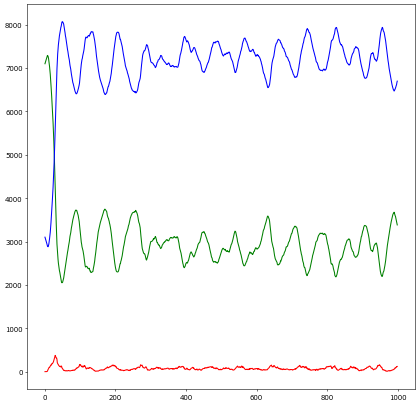

In [6]:
plt.figure(figsize=(10, 10), dpi=50)
x = [_ for _ in range(STEP)]
plt.plot(x, tree_cnt, color='green')
plt.plot(x, fire_cnt, color='red')
plt.plot(x, ground_cnt, color='blue')
plt.show()